In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:

def islas_infactibles(input_csv, output_csv):
    
    infactibles = 0
    factibles = 0
    numero_islas = 0
    # Lee el archivo CSV
    df = pd.read_csv(input_csv)
    
    # Lista para almacenar los resultados
    results = []

    # Variables para rastrear los 0 consecutivos
    consecutive_zeros = 0
    start_index = None

    # Iterar sobre las filas del DataFrame
    for index, row in df.iterrows():
        if row['f'] == 0:
            infactibles += 1
            if consecutive_zeros == 0:
                start_index = index + 1  # +1 para que coincida con la fila en el CSV
            consecutive_zeros += 1
        else:
            factibles += 1
            if consecutive_zeros > 0:
                results.append([start_index, consecutive_zeros])
                consecutive_zeros = 0
                start_index = None

    # Captura el último grupo de 0's si termina con 0
    if consecutive_zeros > 0:
        results.append([start_index, consecutive_zeros])
    numero_islas = len(results)
    
    # Crea un DataFrame para los resultados
    results_df = pd.DataFrame(results, columns=['fila', 'cantidad_0s'])

    # Guarda los resultados en un nuevo archivo CSV
    results_df.to_csv(output_csv, index=False)
    
    results = list(zip(*results))
    # Imprime los resultados
    print(results_df)
    return infactibles, factibles, numero_islas, results


In [4]:
def islas(input_csv):
    # Lee el archivo CSV
    df = pd.read_csv(input_csv)
    
    # Lista para almacenar los resultados
    results = []

    # Variables para rastrear los consecutivos
    consecutivos = 0
    anterior = None

    # Iterar sobre las filas del DataFrame
    for index, row in df.iterrows():
        actual = row['f']
        if actual == anterior or anterior is None:
            consecutivos += 1
        else:
            results.append(consecutivos)
            consecutivos = 1
        anterior = actual
    
    # Añadir la última "isla" a los resultados
    results.append(consecutivos)

    print(results)
    return results


In [5]:
def islas_factibles(input_csv, output_csv):
    infactibles = 0
    factibles = 0
    numero_islas = 0
    
    # Lee el archivo CSV
    df = pd.read_csv(input_csv)
    
    # Lista para almacenar los resultados
    results = []

    # Variables para rastrear los 1 consecutivos
    consecutive_ones = 0
    start_index = None

    # Iterar sobre las filas del DataFrame
    for index, row in df.iterrows():
        if row['f'] == 1:
            factibles += 1
            if consecutive_ones == 0:
                start_index = index + 1  # +1 para que coincida con la fila en el CSV
            consecutive_ones += 1
        else:
            infactibles += 1
            if consecutive_ones > 0:
                results.append([start_index, consecutive_ones])
                consecutive_ones = 0
                start_index = None

    # Captura el último grupo de 1's si termina con 1
    if consecutive_ones > 0:
        results.append([start_index, consecutive_ones])
    numero_islas = len(results)
    
    # Crea un DataFrame para los resultados
    results_df = pd.DataFrame(results, columns=['fila', 'cantidad_1s'])

    # Guarda los resultados en un nuevo archivo CSV
    results_df.to_csv(output_csv, index=False)

    # Imprime los resultados
    print(results_df)
    results = list(zip(*results))
    return infactibles, factibles, numero_islas, results


In [6]:
def remover_numero(lista,numero):
    while numero in lista:
        lista.remove(numero)

In [7]:
def grafica_linea(lista_numeros):
    """
    Genera un gráfico de líneas a partir de una lista de números.

    :param lista_numeros: Lista de números a graficar.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(lista_numeros, marker='o', linestyle='-')
    plt.title("Tamaño islas")
    plt.xlabel("Indice isla")
    plt.ylabel("Numero de elementos por isla")
    plt.grid(True)
    plt.show()


In [8]:
def grafica_linea2(lista_numeros1, lista_numeros2):
    """
    Genera un gráfico de líneas a partir de dos listas de números.

    :param lista_numeros1: Primera lista de números a graficar (en rojo).
    :param lista_numeros2: Segunda lista de números a graficar (en azul).
    """
    plt.figure(figsize=(10, 5))
    
    # Graficar la primera lista en rojo
    plt.plot(lista_numeros1, marker='o', linestyle='-', color='red', label='Lista 1')
    
    # Graficar la segunda lista en azul
    plt.plot(lista_numeros2, marker='o', linestyle='-', color='blue', label='Lista 2')
    
    # Añadir título y etiquetas
    plt.title("Comparación de Tamaños de Islas")
    plt.xlabel("Índice Isla")
    plt.ylabel("Número de Elementos por Isla")
    
    # Añadir cuadrícula
    plt.grid(True)
    
    # Añadir leyenda
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()


In [9]:
def plot_histogram(lista_numeros):
    """
    Función que recibe una lista de números y genera un gráfico de histograma con cada valor como una barra individual.
    
    Parámetros:
    - lista_numeros: Lista de números (de tipo int o float).
    """
    # Crear un rango único para el eje x
    x_range = np.arange(len(lista_numeros))
    
    plt.bar(x_range, lista_numeros, align='center', alpha=0.7)
    plt.xlabel('Índice de valor')
    plt.ylabel('Valor')
    plt.title('Histograma por valor')
    plt.grid(True)
    plt.show()

In [10]:
def intercalate_lists(list1, list2):
    intercalated_list = []
    length = max(len(list1), len(list2))
    for i in range(length):
        if i < len(list1):
            intercalated_list.append(list1[i])
        if i < len(list2):
            intercalated_list.append(list2[i])
    return intercalated_list

def scatter_plot2(list1, list2, title='Scatter Plot'):
    plt.figure(figsize=(8, 6))  # Tamaño opcional para la figura
    
    # Intercalar las listas
    intercalated_list = intercalate_lists(list1, list2)
    
    # Crear listas de índices y colores
    x = list(range(len(intercalated_list)))
    y = intercalated_list
    colors = ['red' if i % 2 == 0 else 'blue' for i in range(len(intercalated_list))]
    
    plt.scatter(x, y, alpha=0.6, s=50, c=colors)  # Usar los colores intercalados
    plt.title(title)
    plt.xlabel('Índice del Elemento')
    plt.ylabel('Valor')
    plt.grid(True)  # Añadir cuadrícula opcionalmente
    plt.show()

In [11]:
def scatter_plot(data, title='Scatter Plot'):
    plt.figure(figsize=(8, 6))  # Tamaño opcional para la figura
    
    # Coordenadas x: valores secuenciales
    x = list(range(len(data)))
    # Coordenadas y: valores de la lista de datos
    y = data
    
    plt.scatter(x, y, alpha=0.6, s=50)  # Ajustar alpha y tamaño de los marcadores
    plt.title(title)
    plt.xlabel('Índice del Elemento')
    plt.ylabel('Valor')
    plt.grid(True)  # Añadir cuadrícula opcionalmente
    plt.show()


In [12]:
def plot_dual_violin(data1, data2, title="Violin Plot"):
    # Verificar que las listas tengan la misma longitud
    if len(data1) != len(data2):
        raise ValueError("Las listas deben tener la misma longitud")

    # Crear un DataFrame combinando los datos
    df = pd.DataFrame({
        'Datos1': data1,
        'Datos2': data2
    })

    # Configurar el tamaño del gráfico
    plt.figure(figsize=(10, 6))

    # Crear el gráfico de violín
    sns.violinplot(data=df, inner="quartile")

    # Personalizar el gráfico
    plt.title(title)
    plt.xlabel('Grupos')
    plt.ylabel('Datos')
    plt.grid(True)
    plt.show()

In [13]:
def plot_histogram_with_frequencies(data):
    plt.plot(data, alpha=0.7)
    plt.xlabel('Orden de Frecuencias')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de Frecuencia de Valores')
    plt.show()

In [14]:
def plot_histogram_with_frequencies2(factibles, infactibles):
    data = intercalate_lists(factibles, infactibles)
    
    # Crear listas para colores
    colors = ['red' if i % 2 == 0 else 'blue' for i in range(len(data))]
    
    plt.bar(range(len(data)), data, color=colors, alpha=0.7)
    plt.xlabel('Orden de Frecuencias')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de Frecuencia de Valores')
    plt.show()



In [14]:
input_csv = '/home/roko/cursos/mkp/resultados/flei/flei.csv'
output_inf_csv = 'resultado_infactibles.csv'
output_fac_csv = 'resultado_factibles.csv'
infactibles, factibles, numero_islas, flei_inf = islas_infactibles(input_csv, output_inf_csv)
infactibles_f, factibles_f, numero_islas_f, flei_fac = islas_factibles(input_csv, output_fac_csv)

print(f"Infactibles = {infactibles}, Factibles = {factibles}, N_islas_inf_flei = {numero_islas}")
print(f"Infactibles = {infactibles_f}, Factibles = {factibles_f}, N_islas_fac_flei = {numero_islas_f}")


          fila  cantidad_0s
0          510            2
1          767            1
2          894            2
3          983            1
4          991            1
...        ...          ...
84203  1040769          127
84204  1040897            1
84205  1040899          509
84206  1041409            1
84207  1041411         7165

[84208 rows x 2 columns]
          fila  cantidad_1s
0            1          509
1          512          255
2          768          126
3          896           87
4          984            7
...        ...          ...
84204  1040896            1
84205  1040898            1
84206  1041408            1
84207  1041410            1
84208  1048576            1

[84209 rows x 2 columns]
Infactibles = 794738, Factibles = 253838, N_islas_inf_flei = 84208
Infactibles = 794738, Factibles = 253838, N_islas_fac_flei = 84209


In [15]:
input_csv = '/home/roko/cursos/mkp/resultados/pet3/pet3resu.csv'
output_inf_csv = 'resultado_infactibles.csv'
output_fac_csv = 'resultado_factibles.csv'
infactibles, factibles, numero_islas, pet3_inf = islas_infactibles(input_csv, output_inf_csv)
infactibles_f, factibles_f, numero_islas_f, pet3_fac = islas_factibles(input_csv, output_fac_csv)

print(f"Infactibles = {infactibles}, Factibles = {factibles}, N_islas_inf_pet3 = {numero_islas}")
print(f"Infactibles = {infactibles_f}, Factibles = {factibles_f}, N_islas_fac_pet3 = {numero_islas_f}")

      fila  cantidad_0s
0     1151            1
1     1278            2
2     1339            1
3     1342            2
4     1401            7
..     ...          ...
490  31591           25
491  31626            6
492  31638           10
493  31651           29
494  31688         1080

[495 rows x 2 columns]
      fila  cantidad_1s
0        1         1150
1     1152          126
2     1280           59
3     1340            2
4     1344           57
..     ...          ...
491  31616           10
492  31632            6
493  31648            3
494  31680            8
495  32768            1

[496 rows x 2 columns]
Infactibles = 10610, Factibles = 22158, N_islas_inf_pet3 = 495
Infactibles = 10610, Factibles = 22158, N_islas_fac_pet3 = 496


In [16]:
input_csv = '/home/roko/cursos/mkp/resultados/pet2/pet2resu.csv'
output_inf_csv = 'resultado_infactibles.csv'
output_fac_csv = 'resultado_factibles.csv'
infactibles, factibles, numero_islas, pet2_inf = islas_infactibles(input_csv, output_inf_csv)
infactibles_f, factibles_f, numero_islas_f, pet2_fac = islas_factibles(input_csv, output_fac_csv)

print(f"Infactibles = {infactibles}, Factibles = {factibles}, N_islas_inf_pet2 = {numero_islas}")
print(f"Infactibles = {infactibles_f}, Factibles = {factibles_f}, N_islas_fac_pet2 = {numero_islas_f}")

    fila  cantidad_0s
0     13            1
1     15            1
2     29            1
3     31            1
4     45            1
..   ...          ...
82   952            8
83   964           12
84   980           12
85   996           12
86  1012           12

[87 rows x 2 columns]
    fila  cantidad_1s
0      1           12
1     14            1
2     16           13
3     30            1
4     32           13
..   ...          ...
83   960            4
84   976            4
85   992            4
86  1008            4
87  1024            1

[88 rows x 2 columns]
Infactibles = 380, Factibles = 644, N_islas_inf_pet2 = 87
Infactibles = 380, Factibles = 644, N_islas_fac_pet2 = 88


In [17]:
input_csv = '/home/roko/cursos/mkp/resultados/pet1/pet1resu.csv'
output_inf_csv = 'resultado_infactibles.csv'
output_fac_csv = 'resultado_factibles.csv'
infactibles, factibles, numero_islas, pet1_inf = islas_infactibles(input_csv, output_inf_csv)
infactibles_f, factibles_f, numero_islas_f, pet1_fac = islas_factibles(input_csv, output_fac_csv)

print(f"Infactibles = {infactibles}, Factibles = {factibles}, N_islas_inf_pet1 = {numero_islas}")
print(f"Infactibles = {infactibles_f}, Factibles = {factibles_f}, N_islas_fac_pet1 = {numero_islas_f}")

   fila  cantidad_0s
0     9            7
1    24            8
2    39            9
3    51            1
4    53           11
   fila  cantidad_1s
0     1            8
1    16            8
2    32            7
3    48            3
4    52            1
5    64            1
Infactibles = 36, Factibles = 28, N_islas_inf_pet1 = 5
Infactibles = 36, Factibles = 28, N_islas_fac_pet1 = 6


In [18]:
plot_histogram_with_frequencies(flei_inf[1])
plot_histogram_with_frequencies(flei_fac[1])

NameError: name 'flei_inf' is not defined

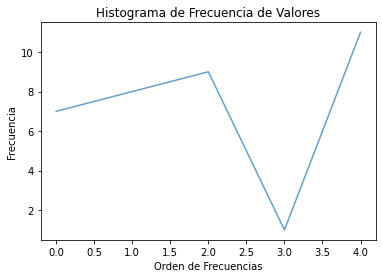

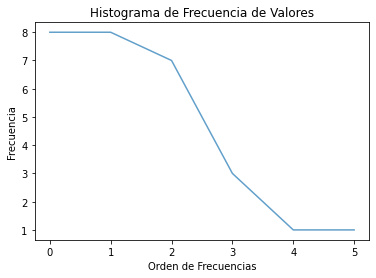

In [19]:
plot_histogram_with_frequencies(pet1_inf[1])
plot_histogram_with_frequencies(pet1_fac[1])

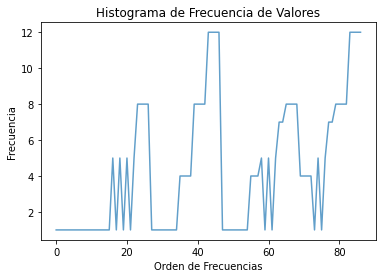

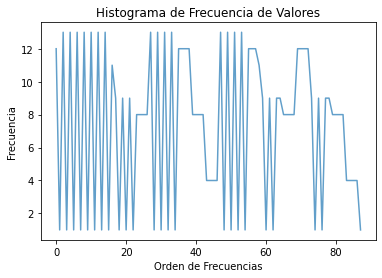

NameError: name 'flei_inf' is not defined

In [20]:
plot_histogram_with_frequencies(pet2_inf[1])
plot_histogram_with_frequencies(pet2_fac[1])


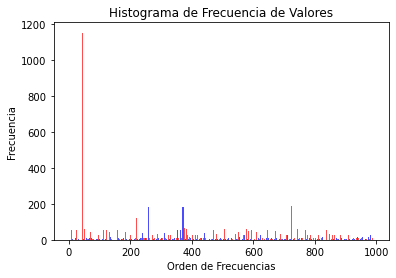

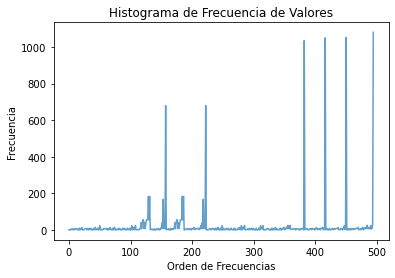

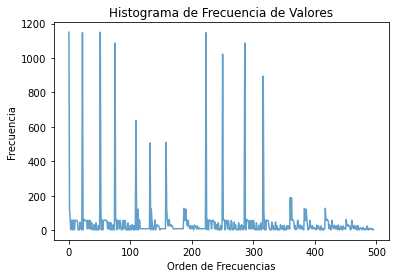

In [21]:
plot_histogram_with_frequencies2(pet3_fac[1], pet3_inf[1])
plot_histogram_with_frequencies(pet3_inf[1])
plot_histogram_with_frequencies(pet3_fac[1])

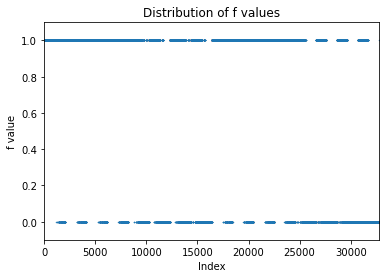

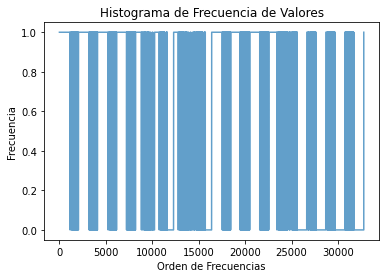

In [22]:
def plot_f_distribution(data):
    """
    Grafica la distribución de una lista de valores 'f'.

    Parameters:
    data (list): Lista de valores de la columna 'f'.
    """
    # Crear una figura y un eje
    fig, ax = plt.subplots()

    # Graficar los datos
    ax.plot(data, linestyle='none', marker='.', markersize=1)

    # Ajustar los límites de los ejes
    ax.set_xlim(0, len(data))
    ax.set_ylim(min(data) - 0.1, max(data) + 0.1)

    # Añadir etiquetas y título
    ax.set_xlabel('Index')
    ax.set_ylabel('f value')
    ax.set_title('Distribution of f values')

    # Mostrar la gráfica
    plt.show()

# Leer el archivo CSV
df = pd.read_csv('/home/roko/cursos/mkp/resultados/pet3/pet3resu.csv')

# Extraer la columna 'f'
data = df['f'].tolist()

# Llamar a la función para graficar
plot_f_distribution(data)
plot_histogram_with_frequencies(data)


In [23]:
def plot_violin(data, title='Violin Plot'):
    plt.figure(figsize=(8, 6))  # Tamaño opcional para la figura
    sns.violinplot(data=data, orient='v')
    plt.title(title)
    plt.xlabel('Datos')
    plt.ylabel('Valor')
    plt.show()


[8, 7, 8, 8, 7, 9, 3, 1, 1, 11, 1]


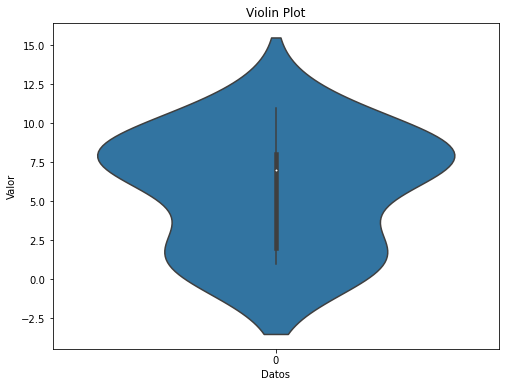

In [24]:
islaas = islas('/home/roko/cursos/mkp/resultados/pet1/pet1resu.csv')
plot_violin(islaas)